**1. Import required libraries and read the dataset.**

In [1]:
#importing required libraries 
import numpy as np 
import pandas as pd  # To handle data in the  form of rows and columns 
import matplotlib.pyplot as plt # importing ploting libraries
import seaborn as sns#importing seaborn for statistical plots
import warnings
warnings.filterwarnings('ignore')


In [2]:
#importing Machine learning libraries
from sklearn.preprocessing import LabelEncoder # for label encoding categorical columns
from sklearn.model_selection import train_test_split #to split the data for model
from sklearn.preprocessing import StandardScaler  #  To Standardize the data

In [3]:
data=pd.read_csv('Apps_data+(1).csv') #reading the data using pd.read_csv()
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features**

In [4]:
data.head() #checking first 5 samples

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#checking  the shape of  the dataset
data.shape

(10841, 13)

In [6]:
#info ofthe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model
building.**


In [7]:
data.describe() #getting summary of numerical columns 

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
data.describe(include='O').T #getting summary of categorical columns 

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


**Observations**
1. Rating column is the only numeric datatype column in the whole data
2. All the other  columns are object datatype
3. We need the columns as numeric datatype for analysis

**Columns List**

Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',

'Content Rating', 'Rating_category'

4. The above columns should be in numeric datatype for analysis. Required preprocessing , encoding , scaling etc.. should be
   carried out for these columns 
5. There are other columns in the data which are redundant for analysis


**4. Check if there are any duplicate records in the dataset? if any drop them.**

In [9]:
data.duplicated().sum() # there are  483 duplicates 

483

In [10]:
data1 = data.drop_duplicates() #dropping duplicates using drop_duplicates()

In [11]:
data1.duplicated().sum() #checking whether duplicates exist or not after dropping it 

0

In [12]:
data1.shape #new shape of dataset after dropping duplicates 

(10358, 13)

**5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them**

In [13]:
data1['Category'].unique()  #all unique sub categories

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [14]:
data1['Category'].nunique() #total unique subcategories in the column category

34

In [15]:
data1[data1['Category']=='1.9']
# A category named 1.9 which seems to be a invalid category 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
data1.drop(data1[data1['Category']=='1.9'].index,inplace=True) # droping the rows which has category=1.9

In [17]:
data1['Category'].unique() #check for dropped sub category from category column 

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [18]:
data1['Category'].nunique() #after dropping the invalid category , the total sub categories reduced to 33

33

**6. Check if there are missing values present in the column Rating, If any? drop them and and create a new
column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)**

In [19]:
#checking for  missing values in the column Rating
data1['Rating'].isnull().sum()
#There are 1465 missing values in the column rating , which is highest out of all columns 

1465

In [20]:
data1.dropna(subset=['Rating'],axis=0,inplace=True) #dropped all null values from the column rating

In [21]:
data1['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [22]:
data1['Rating_category']=np.where(data1['Rating']<=3.5,'low','high') 
#creating a new column Rating_category and imputing with values based on the column Rating using np.where()

In [23]:
data1['Rating_category'].unique() #check

array(['high', 'low'], dtype=object)

**7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution**

In [24]:
data1['Rating_category'].value_counts()

high    8012
low      880
Name: Rating_category, dtype: int64

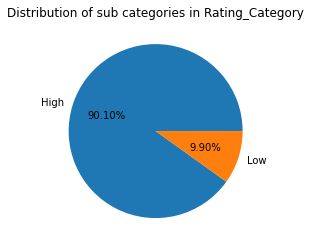

In [25]:
#creating pie chart to see the distribution
plt.pie(x=data1['Rating_category'].value_counts(),labels=['High','Low'],autopct='%.2f%%')
plt.title('Distribution of sub categories in Rating_Category')
plt.show()

**Observations**
1. There are two categories for the column Rating_category
2. More than 90%(90.10%) of the apps have a high rating of more than 3.5
3. Less than 10%(9.90%) of the apps has a low rating of less than 3.5
4. It shows that most of the apps in the app store provided satisfaction to the users 

**8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
handle the outliers using a transformation approach.(Hint: Use log transformation)**


In [26]:
data1['Reviews']=data1['Reviews'].astype(float) #changing datatype of reviews to float

<AxesSubplot:ylabel='Reviews'>

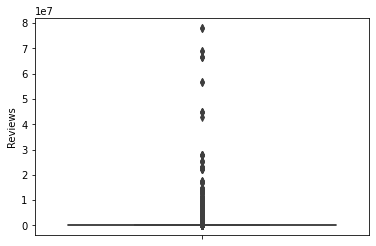

In [27]:
sns.boxplot(data=data1,y='Reviews') # boxplot to see the outliers 

In [28]:
data1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [29]:
#defining  a function to return the lower fence and upper fence to treat the outliers 

def outliers(x):
    sorted(x)
    q1,q3 = np.percentile(x,[25,75])
    IQR = q3-q1
    lf = q1-(1.5*IQR)
    uf = q3+(1.5*IQR)
    return lf,uf

In [30]:
#looping over the values to relace the outliers with lower fence and upper fence 
for i in data1.iloc[:,3:4].columns:
    lf,uf = outliers(data1[i])
    data1[i] = np.where(data1[i]>uf,uf,data1[i])
    data1[i] = np.where(data1[i]<lf,lf,data1[i])

<AxesSubplot:xlabel='Reviews'>

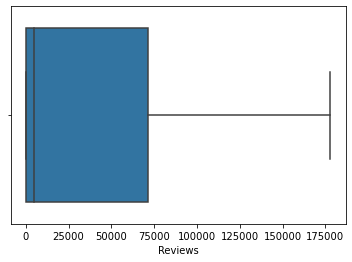

In [31]:
sns.boxplot(data1['Reviews']) #boxplot after replacing outliers 

**9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into
suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
size='Varies with device'**

In [32]:
#dropping the rows where size='Varies with device'
data1.drop(data1[data1['Size']=='Varies with device'].index,inplace=True)

In [33]:
#Replacing Non numeric entries with its corresponding numeric values
data1['Size'] = data1['Size'].replace({'M':'*1e6','k':'*1e3'},regex=True).map(pd.eval).astype(int)

In [34]:
data1[['Size']].head()#check

,Size
0,19000000
1,14000000
2,8700000
3,25000000
4,2800000


**10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type**

In [35]:
data1['Installs'].head() #checking the unwanted characters

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [36]:
data1['Installs']=data1['Installs'].str.replace(',','') #replacing comma with empty string 

In [37]:
data1['Installs']=data1['Installs'].str.replace('+','') #replacing + with empty string

In [38]:
data1['Installs']=data1['Installs'].astype(int)  #converting the datatype to integer 

In [39]:
data1['Installs'].dtype #check

dtype('int32')

**11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.**


In [40]:
data1['Price'].value_counts()

0          6877
$0.99       104
$2.99        98
$4.99        61
$1.99        53
           ... 
$6.49         1
$1.29         1
$299.99       1
$379.99       1
$1.20         1
Name: Price, Length: 68, dtype: int64

In [41]:
data1['Price'] = data1['Price'].str.replace('$','') #replacing the $ symbol with empty string 

In [42]:
data1['Price']=data1['Price'].astype(float) #coverting datatype to float 

In [43]:
data1['Price'].dtype #check

dtype('float64')

**12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
'Current Ver','Android Ver' columns since which are redundant for our analysis)**

In [44]:
#using .drop() to drop the unwanted columns 
data1.drop(columns=['App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver'],inplace=True)

In [45]:
data1.columns #check

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category'],
      dtype='object')

In [46]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   object 
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   int32  
 3   Installs         7424 non-null   int32  
 4   Type             7424 non-null   object 
 5   Price            7424 non-null   float64
 6   Content Rating   7424 non-null   object 
 7   Rating_category  7424 non-null   object 
dtypes: float64(2), int32(2), object(4)
memory usage: 464.0+ KB


**13. Encode the categorical columns.**


Using LabelEncoder class to encode the categorical variables and thereby converting it into numeric datatype

In [47]:
label = LabelEncoder()

In [48]:
data1['Category'] = label.fit_transform(data1['Category']) #label encoding category column

In [49]:
data1['Type'] = label.fit_transform(data1['Type']) #label encoding Type column

In [50]:
data1['Content Rating'] = label.fit_transform(data1['Content Rating']) # label encoding content rating column

In [51]:
data1['Rating_category'] = label.fit_transform(data1['Rating_category']) #label encoding Rating category column

In [52]:
data1.info() #all the columns have been converted into numerical datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   int32  
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   int32  
 3   Installs         7424 non-null   int32  
 4   Type             7424 non-null   int32  
 5   Price            7424 non-null   float64
 6   Content Rating   7424 non-null   int32  
 7   Rating_category  7424 non-null   int32  
dtypes: float64(2), int32(6)
memory usage: 348.0 KB


**14. Segregate the target and independent features (Hint: Use Rating_category as the target)**

In [53]:
# Getting Target Variable using pop()
Y = data1.pop('Rating_category')

In [54]:
X = data1 #Segregating independent Variables

In [55]:
X #predictors

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,159.000,19000000,10000,0,0.0,1
1,0,967.000,14000000,500000,0,0.0,1
2,0,87510.000,8700000,5000000,0,0.0,1
3,0,177920.875,25000000,50000000,0,0.0,4
4,0,967.000,2800000,100000,0,0.0,1
...,...,...,...,...,...,...,...
10833,3,44.000,619000,1000,0,0.0,1
10834,11,7.000,2600000,500,0,0.0,1
10836,11,38.000,53000000,5000,0,0.0,1
10837,11,4.000,3600000,100,0,0.0,1


In [56]:
Y = pd.DataFrame(Y) #coverting target variable type from series to dataframe 

In [57]:
Y #target variable

,Rating_category
0,0
1,0
2,0
3,0
4,0
...,...
10833,0
10834,0
10836,0
10837,0


In [58]:
Y.value_counts() #check

Rating_category
0                  6599
1                   825
dtype: int64

**15. Split the dataset into train and test**

In [59]:
# using train_test_split() to split the data into train and test data
# assigning size of the test data to be 30% of the overall data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=25)

In [60]:
X_train.shape #check

(5196, 7)

In [61]:
X_test.shape #check

(2228, 7)

In [62]:
Y_train.shape #check

(5196, 1)

In [63]:
Y_test.shape #check

(2228, 1)

**16. Standardize the data, so that the values are within a particular range**

Using StandarScaler() to scale the values , so that all the values falls under a standard range 

In [64]:
scale = StandardScaler()

In [65]:
X_train.iloc[:,1:4] = scale.fit_transform(X_train.iloc[:,1:4]) #scaling train data by locating the columns which need to be standardised

In [66]:
X_train.iloc[:,5:6] = scale.fit_transform(X_train.iloc[:,5:6]) #scaling price column for train data

In [67]:
X_test.iloc[:,1:4] = scale.fit_transform(X_test.iloc[:,1:4]) #scaling test data

In [68]:
X_test.iloc[:,5:6] = scale.fit_transform(X_test.iloc[:,5:6]) #scaling test data for price column

In [69]:
X_train #check

,Category,Reviews,Size,Installs,Type,Price,Content Rating
7026,11,-0.390222,0.488929,-0.152073,0,-0.063779,1
5238,24,-0.585186,-0.645944,-0.176184,0,-0.063779,1
5117,25,-0.584182,-0.324754,-0.175955,0,-0.063779,1
2250,20,-0.573601,-0.735878,-0.176076,1,0.269633,1
9751,11,-0.584814,0.788707,-0.176172,0,-0.063779,4
...,...,...,...,...,...,...,...
4581,14,-0.491480,3.015629,-0.164135,0,-0.063779,4
3543,25,2.297773,-0.787268,0.065041,0,-0.063779,1
9647,15,-0.578478,0.488929,-0.175955,1,0.325294,1
505,7,-0.558596,0.360453,-0.164135,0,-0.063779,3


In [70]:
X_test #check

,Category,Reviews,Size,Installs,Type,Price,Content Rating
2746,26,-0.310265,0.460152,-0.143563,0,-0.061348,1
235,4,-0.419265,0.671835,-0.159640,1,0.230646,1
108,2,-0.585780,-0.471251,-0.161248,0,-0.061348,1
1781,14,2.319640,3.042681,1.624895,0,-0.061348,1
1547,17,-0.587054,-0.873448,-0.161408,0,-0.061348,1
...,...,...,...,...,...,...,...
7427,6,-0.587398,-0.428915,-0.161424,0,-0.061348,1
4558,12,-0.586009,-0.428915,-0.161337,0,-0.061348,1
8343,19,-0.406112,-0.344242,-0.152495,0,-0.061348,1
9158,11,0.946300,2.365297,-0.143563,0,-0.061348,1


We can drop the category column and do one hot coding for the label encoded columns , but in previous questions those
columns which are not needed for analysis were dropped. But category column is not mentioned in the list of columns to be dropped . hence we assume that category column is important for analysis , therfore we cant scale the data further .

In [71]:
Y_train.value_counts() #check to ensure whether it has both labels in the model

Rating_category
0                  4617
1                   579
dtype: int64

In [72]:
Y_test.value_counts() #check

Rating_category
0                  1982
1                   246
dtype: int64